In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [49]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Correlation_bw_triplets
imp.reload( Correlation_bw_triplets)
from  Correlation_bw_triplets import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *


In [50]:
def process_model_rl(model = 'ambi_both', which_trial = 'all'):
    
    kwargs = {}
    
    if model == 'ambi_both':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
    elif model == 'ambi_present':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
    elif model == 'ambi_level':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

    # for gain
    kwargs['task']='gain'

    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_g, model_param_df_g=(all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial))

    # for loss
    kwargs['task']='loss'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # for shock
    kwargs['task']='shock'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
    model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # stacking all the df's for a single model 
    model_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
    model_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))
    
    #reverse beta when necessary
    # magnitude
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    # probability
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    
    return(model_param_df, model_summary_df)

## Model 1 - Ambiguity Presence

### All trials

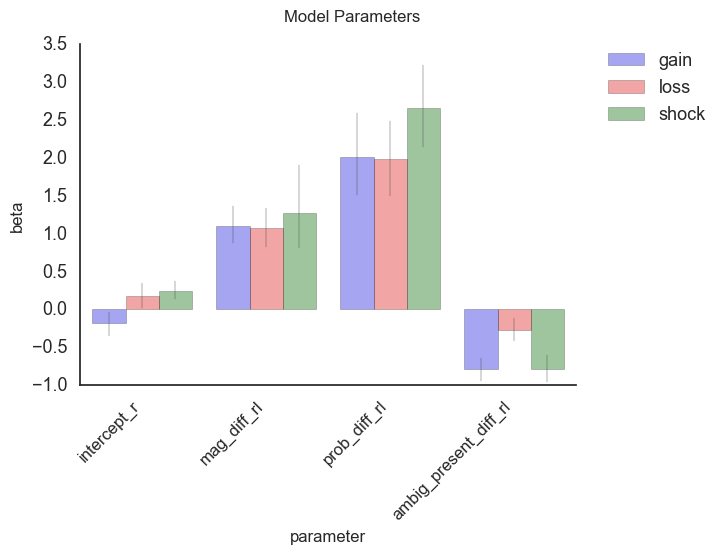

In [51]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'all')
fig = plot_params_rl(model_param_df, stripplot=False)

In [52]:
model_param_df.head()

,MID,parameter,beta,se,task
1,vp06,intercept_r,-0.061277,0.192281181164,loss
2,vp06,mag_diff_rl,1.960562,0.392132846086,loss
3,vp06,prob_diff_rl,0.540962,0.261862061807,loss
4,vp06,ambig_present_diff_rl,0.062450,0.187913958601,loss
5,vp07,intercept_r,0.228409,0.200955746152,loss


### First trials¶

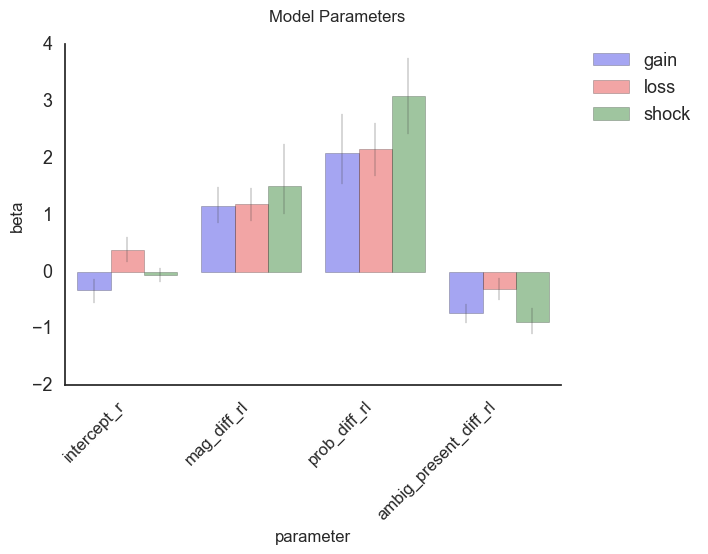

In [53]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'firstTrials')
fig = plot_params_rl(model_param_df, stripplot=False)

In [54]:
model_param_df.head()

,MID,parameter,beta,se,task
1,vp06,intercept_r,-0.278932,0.260637101161,loss
2,vp06,mag_diff_rl,2.370969,0.556589198543,loss
3,vp06,prob_diff_rl,1.222384,0.407500293539,loss
4,vp06,ambig_present_diff_rl,-0.233393,0.255000107833,loss
5,vp07,intercept_r,0.527918,0.284098083125,loss


### Late Trials

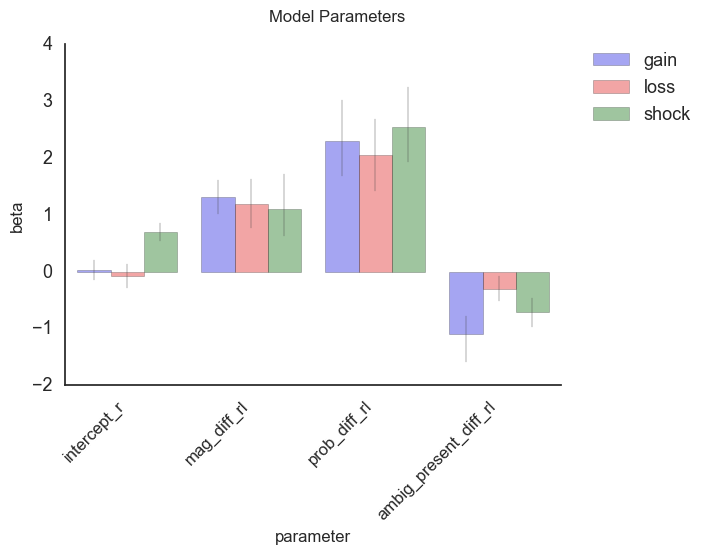

In [55]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'lateTrials')
fig = plot_params_rl(model_param_df, stripplot=False)

In [56]:
model_param_df.head()

,MID,parameter,beta,se,task
1,vp06,intercept_r,0.325510,0.336675580474,loss
2,vp06,mag_diff_rl,1.980517,0.691884245999,loss
3,vp06,prob_diff_rl,-0.026585,0.411080574409,loss
4,vp06,ambig_present_diff_rl,0.383747,0.342354501204,loss
5,vp07,intercept_r,-0.155567,0.302079686909,loss


## Model 2 - Ambiguity Level

### All trials

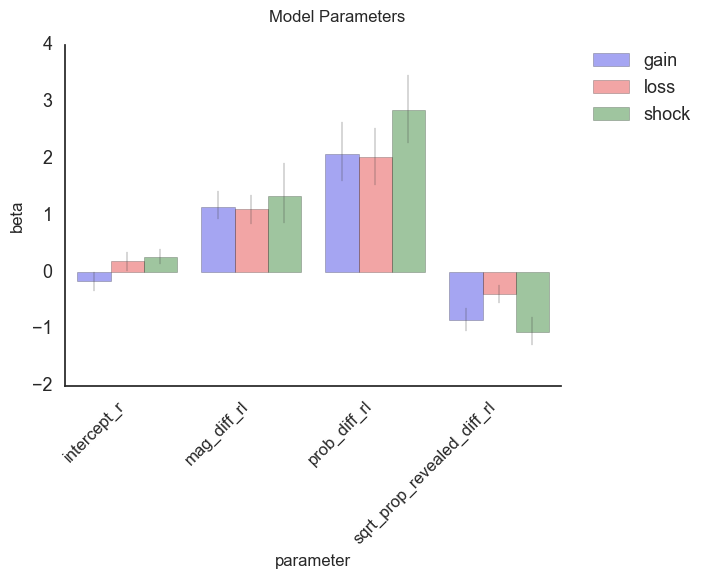

In [57]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'all')
fig = plot_params_rl(model_param_df, stripplot=False)

### First Trials

C:\Users\Hanna\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


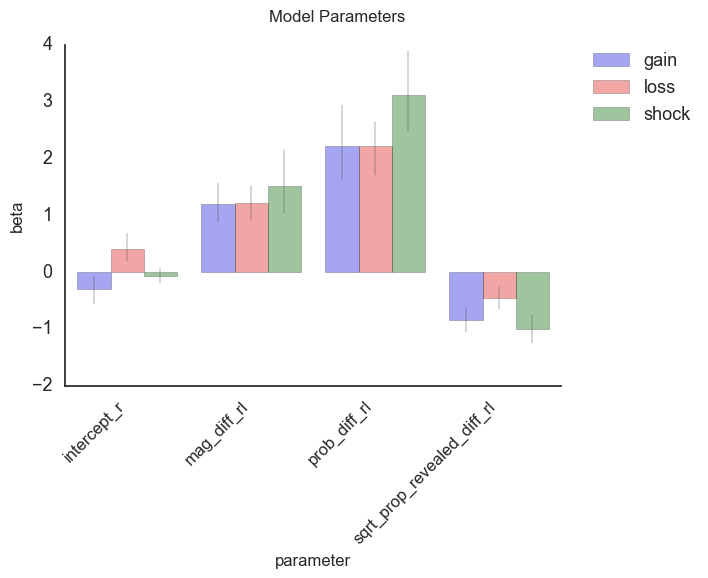

In [58]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'firstTrials')
fig = plot_params_rl(model_param_df, stripplot=False)

### Late Trials

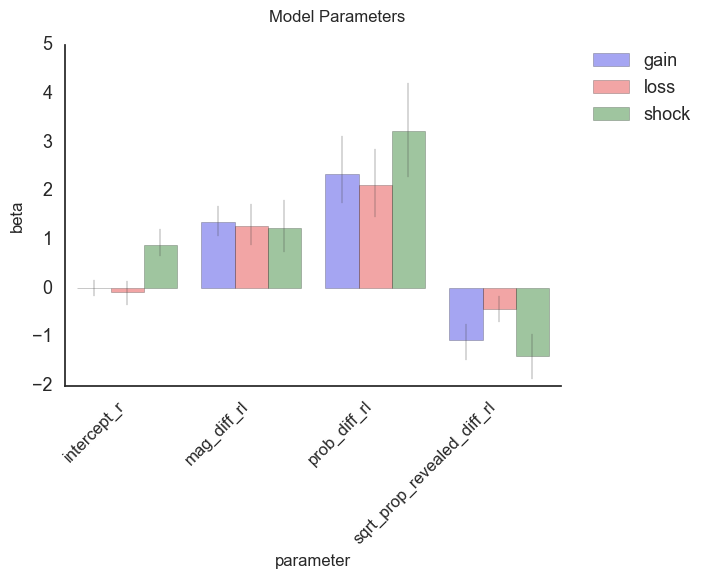

In [59]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'lateTrials')
fig = plot_params_rl(model_param_df, stripplot=False)